In [1]:
import pandas as pd
df = pd.read_csv('D:\housepricedata.csv')

In [2]:
df


,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,953,2,1,3,7,1,460,1
1456,13175,6,6,1542,2,0,3,7,2,500,1
1457,9042,7,9,1152,2,0,4,9,2,252,1
1458,9717,5,6,1078,1,0,2,5,0,240,0


In [3]:
#Converting our dataframe into an array
dataset = df.values
dataset

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]], dtype=int64)

In [5]:
#split dataset into input features (X), predict (Y)
X = dataset[:,0:10]
Y = dataset[:,10]

In [6]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
from sklearn.model_selection import train_test_split
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)


(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


In [7]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import LearningRateScheduler

lr_sched = LearningRateScheduler(lambda epoch: 1e-4 * (0.75 ** np.floor(epoch / 2)))
#Hidden layer 1: 32 neurons, ReLU activation
#Hidden layer 2: 32 neurons, ReLU activation
#Output Layer: 1 neuron, Sigmoid activation
model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])
#The loss function for outputs that take the values 1 or 0 is called binary cross entropy.
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val), callbacks=[lr_sched])

Epoch 1/100
32/32 [==============================] - 2s 15ms/step - loss: 0.6881 - accuracy: 0.6135 - val_loss: 0.6839 - val_accuracy: 0.6712
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6817 - accuracy: 0.6556 - val_loss: 0.6818 - val_accuracy: 0.6256
Epoch 3/100
32/32 [==============================] - ETA: 0s - loss: 0.6765 - accuracy: 0.62 - 0s 4ms/step - loss: 0.6768 - accuracy: 0.6213 - val_loss: 0.6799 - val_accuracy: 0.5342
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6724 - accuracy: 0.5890 - val_loss: 0.6778 - val_accuracy: 0.5251
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6684 - accuracy: 0.5949 - val_loss: 0.6755 - val_accuracy: 0.5251
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6645 - accuracy: 0.5832 - val_loss: 0.6727 - val_accuracy: 0.5160
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6606 - accuracy: 0.5851 - val_loss: 

In [8]:
# evaluate it on the test set
#1 returns the loss as the first element and the accuracy as the second element
model.evaluate(X_test, Y_test)[1]

7/7 [==============================] - 0s 4ms/step - loss: 0.3229 - accuracy: 0.8630


0.8630136847496033

In [9]:

model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(10,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
])
model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist_2 = model_2.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 2s 28ms/step - loss: 0.5169 - accuracy: 0.7505 - val_loss: 0.4513 - val_accuracy: 0.7763
Epoch 2/100
32/32 [==============================] - 1s 21ms/step - loss: 0.3472 - accuracy: 0.8562 - val_loss: 0.3225 - val_accuracy: 0.8767
Epoch 3/100
32/32 [==============================] - 1s 16ms/step - loss: 0.2940 - accuracy: 0.8816 - val_loss: 0.3459 - val_accuracy: 0.8813
Epoch 4/100
32/32 [==============================] - 1s 17ms/step - loss: 0.2970 - accuracy: 0.8748 - val_loss: 0.2974 - val_accuracy: 0.8767
Epoch 5/100
32/32 [==============================] - 1s 18ms/step - loss: 0.2624 - accuracy: 0.9002 - val_loss: 0.2753 - val_accuracy: 0.8721
Epoch 6/100
32/32 [==============================] - 1s 18ms/step - loss: 0.2356 - accuracy: 0.9022 - val_loss: 0.2627 - val_accuracy: 0.8904
Epoch 7/100
32/32 [==============================] - 1s 20ms/step - loss: 0.2510 - accuracy: 0.8973 - val_loss: 0.3334 - val_accuracy: 0.8584
Epoch 

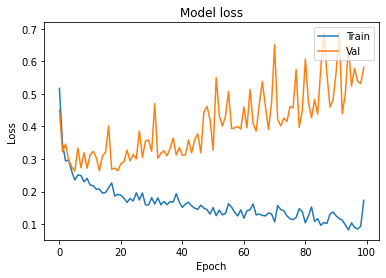

In [11]:
#Below graph shown as clear overfitting 
import matplotlib.pyplot as plt
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

Epoch 1/100
32/32 [==============================] - 3s 41ms/step - loss: 14.2055 - accuracy: 0.6115 - val_loss: 3.8991 - val_accuracy: 0.7717
Epoch 2/100
32/32 [==============================] - 1s 28ms/step - loss: 1.6725 - accuracy: 0.8464 - val_loss: 0.6876 - val_accuracy: 0.8630
Epoch 3/100
32/32 [==============================] - 1s 27ms/step - loss: 0.5687 - accuracy: 0.8581 - val_loss: 0.5040 - val_accuracy: 0.8676
Epoch 4/100
32/32 [==============================] - 1s 26ms/step - loss: 0.4973 - accuracy: 0.8757 - val_loss: 0.4796 - val_accuracy: 0.8813
Epoch 5/100
32/32 [==============================] - 1s 26ms/step - loss: 0.5442 - accuracy: 0.8474 - val_loss: 0.5380 - val_accuracy: 0.8219
Epoch 6/100
32/32 [==============================] - 1s 26ms/step - loss: 0.4883 - accuracy: 0.8699 - val_loss: 0.4663 - val_accuracy: 0.8584
Epoch 7/100
32/32 [==============================] - 1s 27ms/step - loss: 0.4743 - accuracy: 0.8738 - val_loss: 0.4687 - val_accuracy: 0.8813
Epoch

32/32 [==============================] - 1s 27ms/step - loss: 0.4472 - accuracy: 0.8679 - val_loss: 0.4262 - val_accuracy: 0.8767
Epoch 59/100
32/32 [==============================] - 1s 27ms/step - loss: 0.4170 - accuracy: 0.8904 - val_loss: 0.4245 - val_accuracy: 0.8904
Epoch 60/100
32/32 [==============================] - 1s 26ms/step - loss: 0.4283 - accuracy: 0.8933 - val_loss: 0.4445 - val_accuracy: 0.8721
Epoch 61/100
32/32 [==============================] - 1s 27ms/step - loss: 0.4358 - accuracy: 0.8806 - val_loss: 0.4247 - val_accuracy: 0.8904
Epoch 62/100
32/32 [==============================] - 1s 27ms/step - loss: 0.4256 - accuracy: 0.8885 - val_loss: 0.4268 - val_accuracy: 0.8676
Epoch 63/100
32/32 [==============================] - 1s 28ms/step - loss: 0.4302 - accuracy: 0.8816 - val_loss: 0.4241 - val_accuracy: 0.8676
Epoch 64/100
32/32 [==============================] - 1s 26ms/step - loss: 0.4345 - accuracy: 0.8885 - val_loss: 0.4721 - val_accuracy: 0.8447
Epoch 65/100

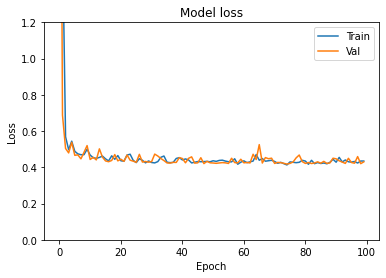

In [13]:
#adding regularizers
from keras.layers import Dropout
from keras import regularizers
model_3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])
model_3.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist_3 = model_3.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()